# Solving differential equations

- by Börge Göbel

## 1. Euler method

## 1.1 First order differential equation

We try to solve the following type of differential equation

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y)\\)

Since \\( \frac{\mathrm{d}y}{\mathrm{d}t} = \frac{y(t+h)-y(t)}{h}\\), we know that \\( y(t+h) = \frac{\mathrm{d}y}{\mathrm{d}t}h + y(t)\\).

Therefore, we can repetitively iterate the propagation: 

From the value \\( y_n \\) at step \\( n \\), corresponding to the time \\( t \\), we can calculate the value \\( y_{n+1} \\) at step \\( (n+1) \\), corresponding to the time \\( (t+h) \\):

\\( y_{n+1} = y_n + \frac{\mathrm{d}y}{\mathrm{d}t}h \\) which is 

\\( y_{n+1} = y_n + f(t,y_n) h \\)

### Example 1) Radioactive decay

\\( \dot{y} = -y\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -y\\)

Analytical solution: \\( y(t)=y_0 \exp(-t)\\)

In [1]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt 

In [2]:
# Starting value
y = 1

# Number of iterations
nmax = 200

#Stepsize
h = 0.01

#Collect data
t_values = [0]
y_values = [y]

In [3]:
for i in range(nmax):
    f = -y
    y = y + f * h
    t_values.append(i*h)
    y_values.append(y)

In [4]:
### Define a function "eulerODE"

In [5]:
y

0.13397967485796206

In [6]:
np.exp(-nmax*h)

0.1353352832366127

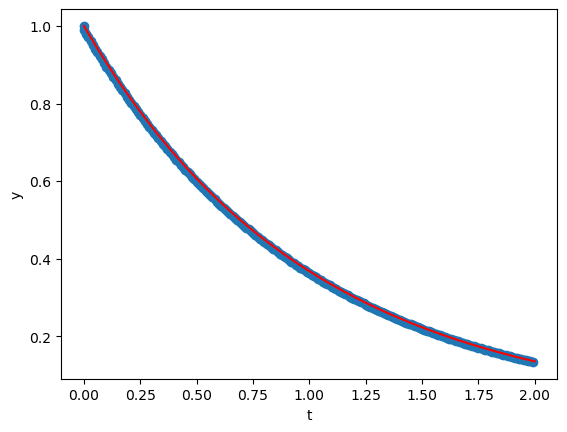

In [7]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(t_values, y_values)

### Define a function "eulerODE"

In [8]:
def eulerODE(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        y = y + f(t,y) * h
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

In [9]:
# Define function
def f_ODE(t,y):
    return -y

# Call Euler method
t0 = 0
y0 = 1
nmax = 200
h = 0.01
solution = eulerODE(f_ODE, t0, y0, nmax,h)

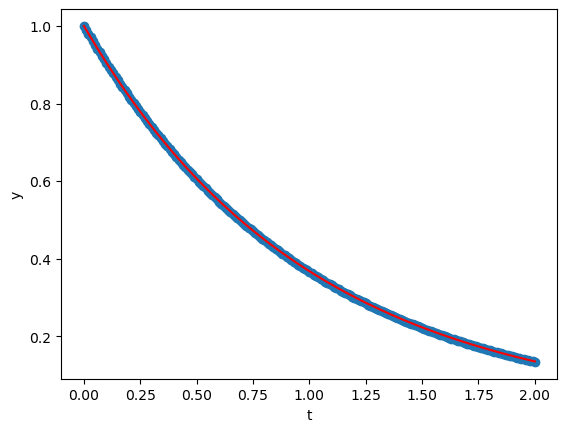

In [10]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = 1*np.exp(-test_t)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

In [11]:
a = 0.01

# Define function
def f_ODE(t,y):
    return -a*y*t

# Call Euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1
solution = eulerODE(f_ODE, t0, y0, nmax,h)

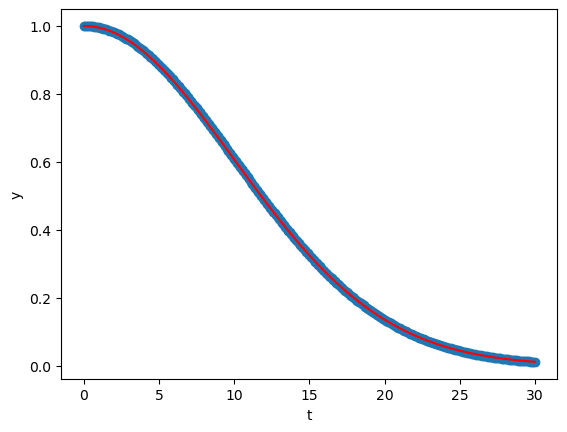

In [12]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2*a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution[0], solution[1])

### 1.2 Higher-order differential equations

Example: Second-order differential equation: \\( y''(t) = f\left(t,y(t),y'(t)\right)\\)

Introduce: \\( z_0(t) = y(t)\\) and \\( z_1(t) = y'(t)\\)

\\( \begin{pmatrix}z_0'(t)\\z_1'(t)\end{pmatrix}=\begin{pmatrix}z_1(t)\\f\left(t,z_0(t),z_1(t)\right)\end{pmatrix}\\)

Therefore, we can describe the second-order differential equation by a set of two first-order differential equations. We can solve both with our Euler method

\\( z_0^{(n+1)} = z_0^{(n)} + z_1^{(n)} h \\)

\\( z_1^{(n+1)} = z_1^{(n)} + f\left(t,z_0^{(n)},z_1^{(n)}\right) h \\)

Or, going back to our initial nomenclature:

\\( y_{n+1} = y_{n} + y'_{n} h \\)

\\( y'_{n+1} = y'_{n} + f\left(t,y_{n},y'_{n}\right) h \\)

In [13]:
def eulerODE2(f,t0,y00,y10,nmax,h):
    # f: Function
    # t0: Starting time
    # y00: Starting value of y(t)
    # y10: Starting value of y'(t)
    # nmax: Number of iterations
    # h: Stepsize
    y0 = y00
    y1 = y10
    t = t0
    t_values = [t]
    y0_values = [y0]
    y1_values = [y1]
    for i in range(1, nmax+1):
        y0 = y0 + y1 * h
        y1 = y1 + f(t,y0,y1) * h
        t = t + h
        t_values.append(t)
        y0_values.append(y0)
        y1_values.append(y1)
    return np.array([t_values, y0_values, y1_values])

### Example 3) Free fall

\\( \ddot{y} = -g\\) or

\\( \frac{\mathrm{d}^2y}{\mathrm{d}t^2} = f(t,y,\dot{y}) = -g\\)

Analytical solution: \\( y(t)=-\frac{g}{2}t^2+v_0t+y_0\\)

In [14]:
g = 9.81

def f_ODE(t,y0,y1):
    return -g

t0 = 0
y00 = 10
y10 = 50
nmax = 100
h = 0.1

solution = eulerODE2(f_ODE,t0,y00,y10,nmax,h)

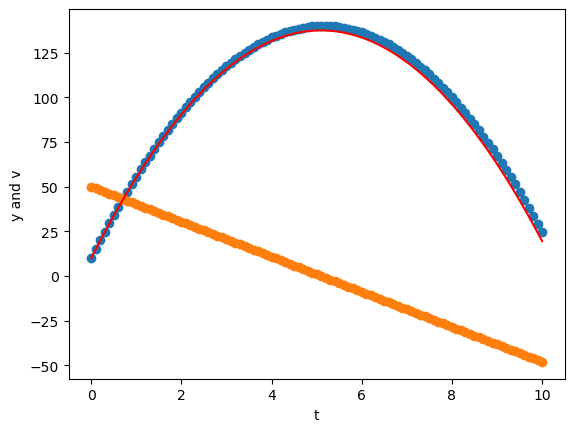

In [15]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = -g/2*test_t**2 + y10*test_t + y00
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y and v')
plt.scatter(solution[0], solution[1])
plt.scatter(solution[0], solution[2])

### Example 4) Harmonic oscillator

\\( \theta''(t) + b\theta'(t) + c\sin(\theta(t)) = 0 \\)

Here, \\( b \\) is the damping parameter and \\( c \\) is determined by the pendulum length \\( c = \frac{g}{l} \\).

### Small-angle approximation

For small angles \\( \theta\ll 1 \\) and without damping b = 0, we have 

\\( \theta''(t) = - \frac{g}{l}\theta(t) \\) with the solution (for \\( \theta'(0) = 0 \\))

\\( \theta(t) = \theta_0\cos\left(\sqrt{\frac{g}{l}}t\right) \\) and a period of \\( T = 2\pi\sqrt{\frac{l}{g}} \\)

In [16]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0

def f_ODE(t,theta0,theta1):
    return -b*theta1 -c*theta0

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

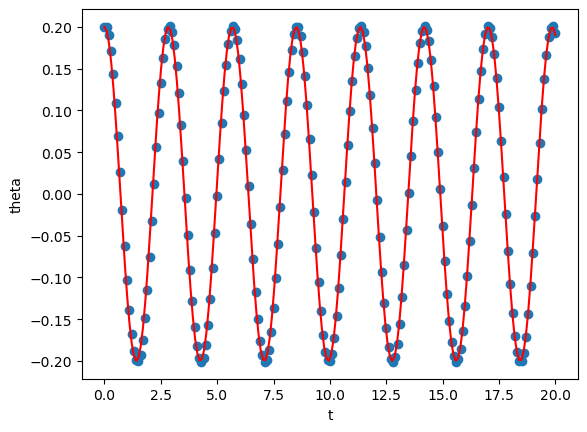

In [17]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(9.81/length)*test_t)
plt.plot(test_t, test_theta, 'red')

plt.xlabel('t')
plt.ylabel('theta')
plt.scatter(solution[0], solution[1])

### Actual equation

- Small starting angle

In [18]:
0.2/np.pi*180

11.459155902616464

In [19]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0

def f_ODE(t,theta0,theta1):
    return -b*theta1-c*np.sin(theta0)

t0 = 0
theta00 = 0.2
theta10 = 0
nmax = 200
h = 0.1

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

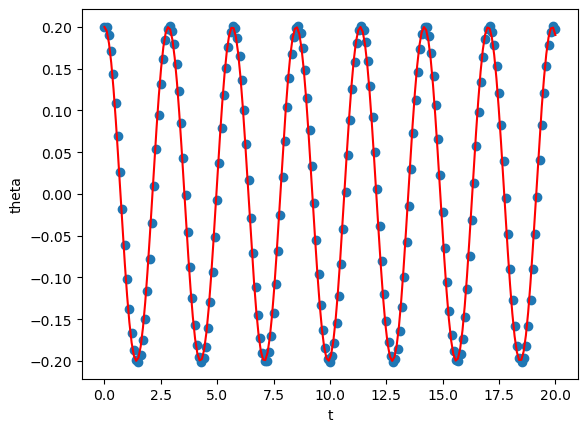

In [20]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(9.81/length)*test_t)
plt.plot(test_t, test_theta, 'red')

plt.xlabel('t')
plt.ylabel('theta')
plt.scatter(solution[0], solution[1])

- Large starting angle

In [21]:
2.0/np.pi*180

114.59155902616465

In [22]:
theta00 = 2.0
h = 0.01
nmax = 2000

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

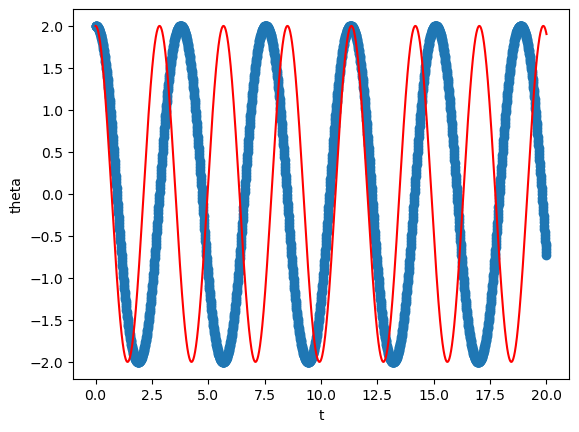

In [23]:
test_t = np.linspace(0, nmax*h, nmax)
test_theta = theta00*np.cos(np.sqrt(9.81/length)*test_t)
plt.plot(test_t, test_theta, 'red')

plt.xlabel('t')
plt.ylabel('theta')
plt.scatter(solution[0], solution[1])

- With damping

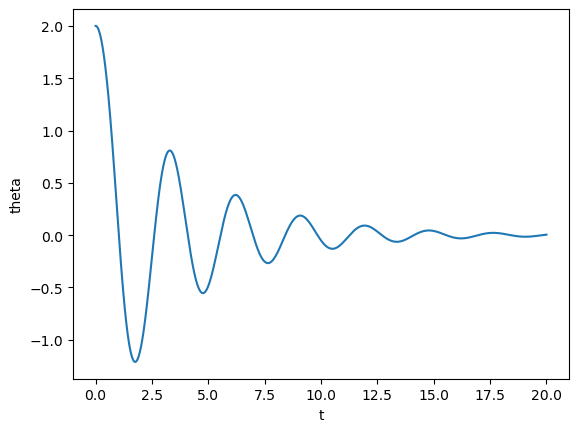

In [24]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0.5

def f_ODE(t,theta0,theta1):
    return -b*theta1 -c*np.sin(theta0)

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 2000
h = 0.01

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('t')
plt.ylabel('theta')
plt.plot(solution[0], solution[1])

- Driven oscillator

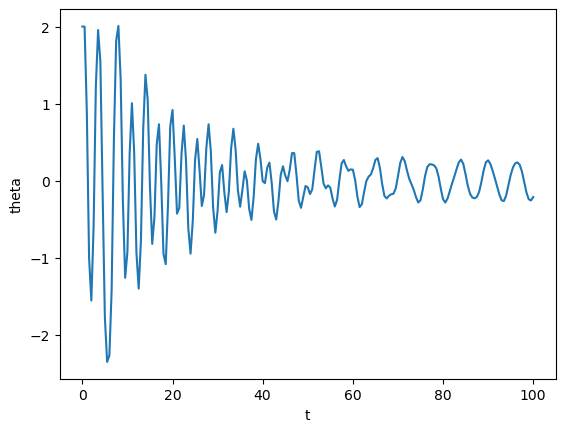

In [25]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0.1
d = -1.0
omega = 1.0

def f_ODE(t,theta0,theta1):
    return -b*theta1 - c*np.sin(theta0) - d*np.sin(omega*t)

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 200
h = 0.5

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('t')
plt.ylabel('theta')
plt.plot(solution[0], solution[1])

# 2. Improved methods

The exist two useful solvers:
- Old: scipy.integrate.oldeint
- New: scipy.integrate.solve_ivp

### Example 2) Time-amplified decay

\\( \dot{y} = -ayt\\) or

\\( \frac{\mathrm{d}y}{\mathrm{d}t} = f(t,y) = -ayt\\)

Analytical solution: \\( y(t)=y_0 \exp(-t^2a/2)\\)

- Our old results (Euler method)

In [26]:
a = 0.01

def f_ODE(t,y):
    return -a*y*t

nmax = 300
y0 = 1
h = 0.1

solution = eulerODE(f_ODE, 0, y0, nmax, h)

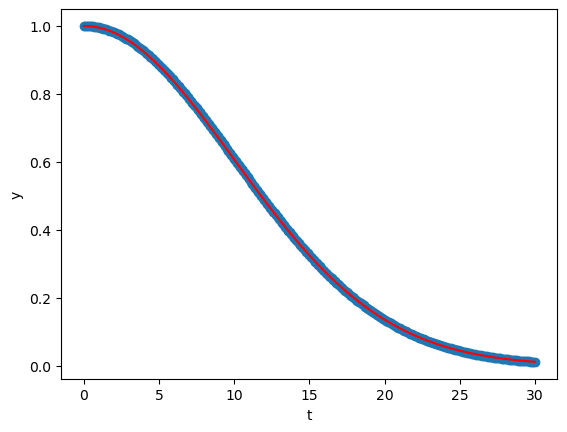

In [27]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution[0],solution[1])

- New results (solve_ivp)

In [28]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method = 'RK45')
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]

In [29]:
solution_RK45.t

array([0.00000000e+00, 1.00000000e-04, 1.10000000e-03, 1.11000000e-02,
       1.11100000e-01, 1.11110000e+00, 1.11111000e+01, 1.92727200e+01,
       2.30667766e+01, 2.68608331e+01, 3.00000000e+01])

In [30]:
solution_RK45.y

array([[1.        , 1.        , 0.99999999, 0.99999938, 0.99993829,
        0.9938463 , 0.53921663, 0.15615019, 0.06995529, 0.02715399,
        0.01112937]])

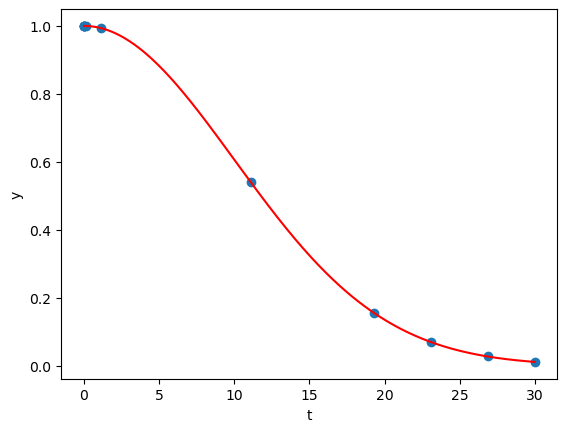

In [31]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution_RK45.t, solution_RK45.y)

In [32]:
solution_RK45 = integrate.solve_ivp(f_ODE, [0,30], [1], method = 'RK45', t_eval = np.linspace(0,h*nmax,nmax))
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]

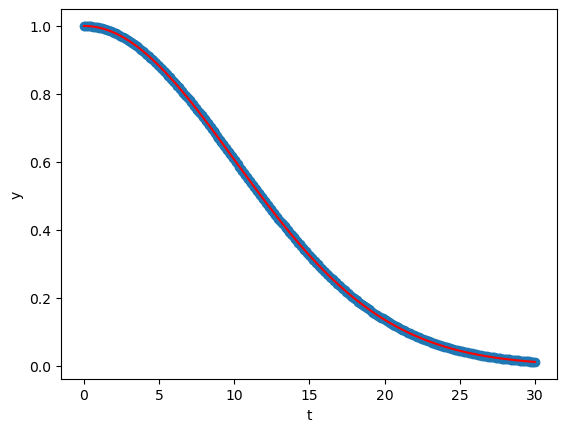

In [33]:
test_t = np.linspace(0, nmax*h, nmax)
test_y = y0*np.exp(-test_t**2 * a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution_RK45.t, solution_RK45.y)

### Example 3) Free fall

In [34]:
g = 9.81

def f_ODE(t,y):
    return y[1], -g

y0 = 10
v0 = 50

solution_RK45 = integrate.solve_ivp(f_ODE, [0,10], [y0, v0], method = 'RK45', t_eval = np.linspace(0,10,101))

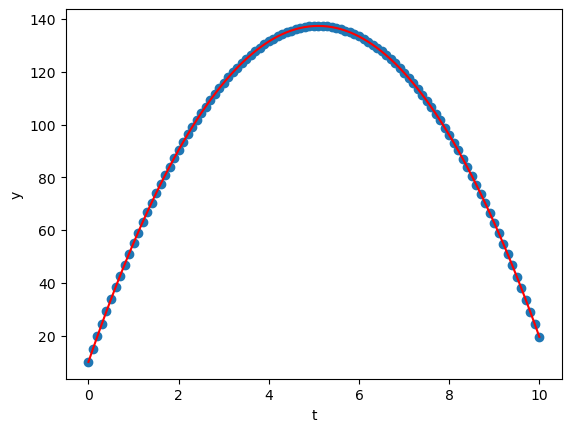

In [35]:
test_t = np.linspace(0, 10, 101)
test_y = -g/2*test_t**2 + y10*test_t + y00
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')

plt.scatter(solution_RK45.t, solution_RK45.y[0])

### Example 4) Driven pendulum

- Our old results (Euler method)

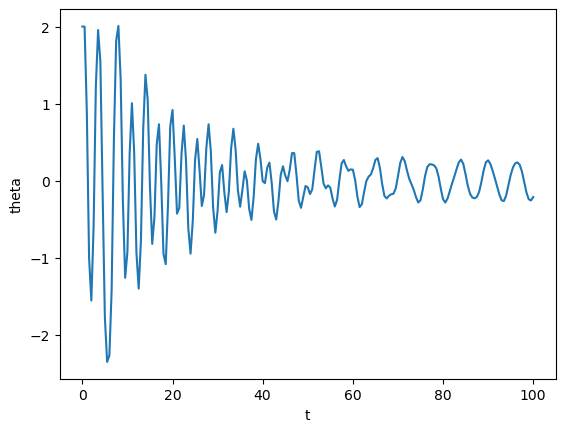

In [36]:
# Pendulum geometry
length = 2
c = 9.81/length

# Damping
b = 0.1
d = -1.0
omega = 1.0

def f_ODE(t,theta0,theta1):
    return -b*theta1 - c*np.sin(theta0) - d*np.sin(omega*t)

t0 = 0
theta00 = 2.0
theta10 = 0
nmax = 200
h = 0.5

solution = eulerODE2(f_ODE,t0,theta00,theta10,nmax,h)

plt.xlabel('t')
plt.ylabel('theta')
plt.plot(solution[0], solution[1])

- New results (solve_ivp)

In [40]:
def f_ODE(t,theta):
    return theta[1], -b*theta[1] - c*np.sin(theta[0]) - d*np.sin(omega*t)

theta00 = 2.0
theta10 = 0.0

solution_RK45 = integrate.solve_ivp(f_ODE, [0,100], [theta00, theta10], method = 'RK45', t_eval = np.linspace(0,100,201))

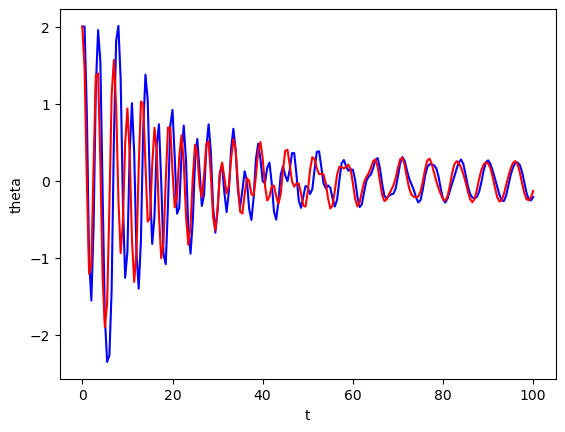

In [41]:
plt.xlabel('t')
plt.ylabel('theta')

plt.plot(solution[0], solution[1], 'blue')
plt.plot(solution_RK45.t, solution_RK45.y[0], 'red')

### Compare more methods

In [42]:
# [https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp]
# methods:
# RK45
# RK23
# DOP853
# Radau
# BDF
# LSODA

In [45]:
t_array = np.linspace(0,100,201)

solution_RK23 = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='RK23', t_eval=t_array)
solution_DOP853 = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='DOP853', t_eval=t_array)
solution_Radau = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='Radau', t_eval=t_array)
solution_BDF = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='BDF', t_eval=t_array)
solution_LSODA = integrate.solve_ivp(f_ODE, [0, 100], [theta00, theta10], method='LSODA', t_eval=t_array)

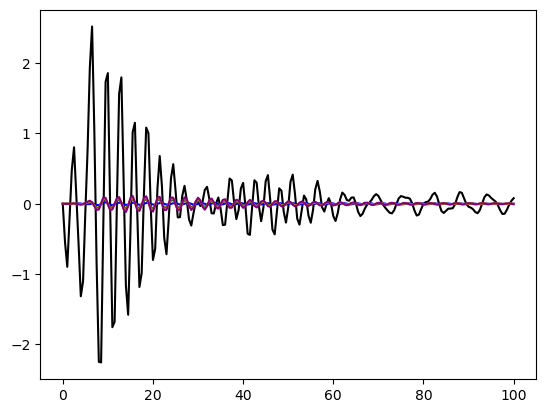

In [46]:
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution[1], 'black')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_RK23.y[0], 'blue')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_DOP853.y[0], 'red')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_Radau.y[0], 'green')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_BDF.y[0], 'orange')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_LSODA.y[0], 'purple')

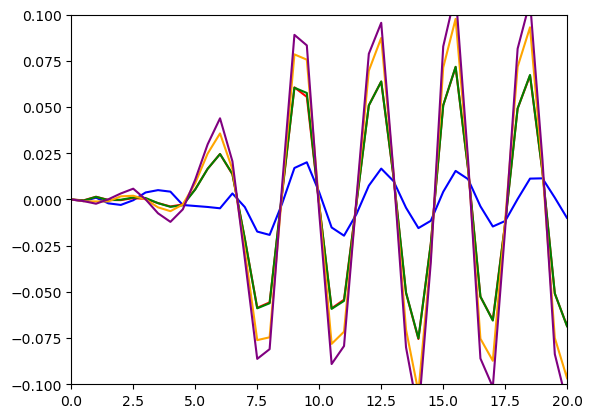

In [47]:
plt.xlim([0,20])
plt.ylim([-0.1,0.1])

#plt.plot(solution_RK45.t,solution_RK45.y[0] - solution[1], 'black')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_RK23.y[0], 'blue')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_DOP853.y[0], 'red')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_Radau.y[0], 'green')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_BDF.y[0], 'orange')
plt.plot(solution_RK45.t,solution_RK45.y[0] - solution_LSODA.y[0], 'purple')

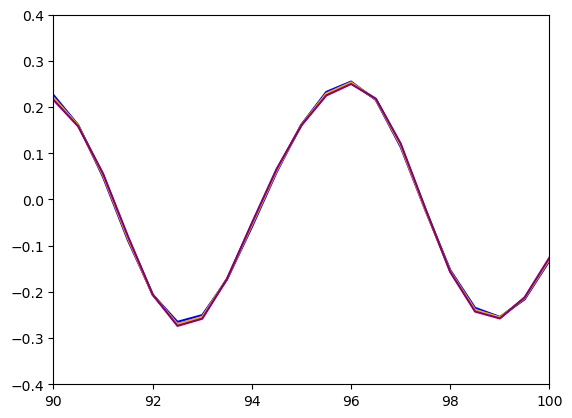

In [48]:
plt.xlim([90,100])
plt.ylim([-0.4,0.4])

plt.plot(solution_RK45.t, solution_RK23.y[0], 'blue')
plt.plot(solution_RK45.t, solution_DOP853.y[0], 'red')
plt.plot(solution_RK45.t, solution_Radau.y[0], 'green')
plt.plot(solution_RK45.t, solution_BDF.y[0], 'orange')
plt.plot(solution_RK45.t, solution_LSODA.y[0], 'purple')

## 3. Theory of the Runge-Kutta methods

There exist several different Runge-Kutta methods

Derivation is difficult: https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods#Derivation_of_the_Runge%E2%80%93Kutta_fourth-order_method

### 3.1 Implementation of RK4

In [49]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Classic_fourth-order_method]

def rk4(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/2, y + k1/2)
        k3 = h * f(t + h/2, y + k2/2)
        k4 = h * f(t + h, y + k3)
        k = 1/6*k1 + 1/3*k2 +1/3*k3 + 1/6*k4
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

### 3.2 Implementation of RK45

In [50]:
# [https://en.wikipedia.org/wiki/List_of_Runge%E2%80%93Kutta_methods#Fehlberg]

def rk45(f,t0,y0,nmax,h):
    # f: Function
    # t0: Starting time
    # y0: Starting value of y
    # nmax: Number of iterations
    # h: Stepsize
    y = y0
    t = t0
    t_values = [t]
    y_values = [y]
    for i in range(1, nmax+1):
        k1 = h * f(t, y)
        k2 = h * f(t + h/4, y + k1/4)
        k3 = h * f(t + h*3/8, y + k1*3/32 + k2*9/32)
        k4 = h * f(t+h*12/13, y+k1*1932/2197-k2*7200/2197+k3*7296/2197)
        k5 = h * f(t+h, y+k1*439/216-k2*8+k3*3680/513-k4*845/4104)
        k6 = h * f(t+h*1/2, y-k1*8/27+k2*2-k3*3544/2565+k4*1859/4104-k5*11/40)
        k = 16/135*k1 + 0*k2 +6656/12825*k3 + 28561/56430*k4 -9/50*k5 + 2/55*k6
        y = y + k
        t = t + h
        t_values.append(t)
        y_values.append(y)
    return np.array([t_values, y_values])

### 3.3 Comparison with Euler method

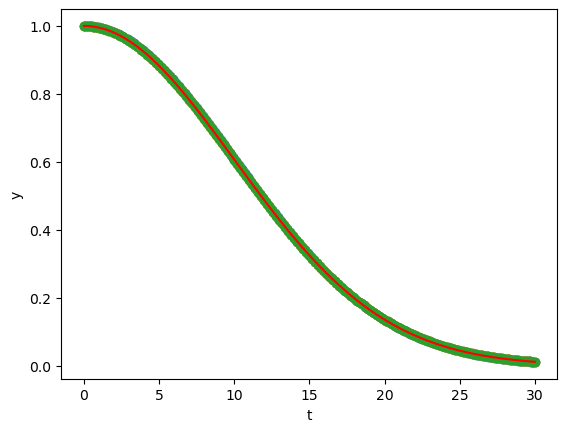

In [51]:
a = 0.01

# Define function
def f_ODE(t,y):
    return -a*y*t

# Call Euler method
t0 = 0
y0 = 1
nmax = 300
h = 0.1

solution_euler = eulerODE(f_ODE, t0, y0, nmax,h)
solution_rk4 = rk4(f_ODE, t0, y0, nmax,h)
solution_rk45 = rk45(f_ODE, t0, y0, nmax,h)

test_t = np.linspace(0, nmax*h, nmax+1)
test_y = y0*np.exp(-test_t**2*a/2)
plt.plot(test_t, test_y, 'red')

plt.xlabel('t')
plt.ylabel('y')
plt.scatter(solution_euler[0], solution_euler[1])
plt.scatter(solution_rk4[0], solution_rk4[1])
plt.scatter(solution_rk45[0], solution_rk45[1])

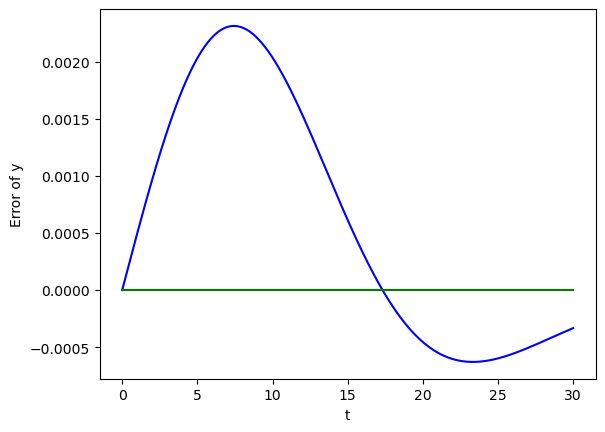

In [52]:
plt.xlabel('t')
plt.ylabel('Error of y')
plt.plot(solution_euler[0], solution_euler[1] - test_y, 'blue')
plt.plot(solution_rk4[0], solution_rk4[1] - test_y, 'red')
plt.plot(solution_rk45[0], solution_rk45[1] - test_y, 'green')

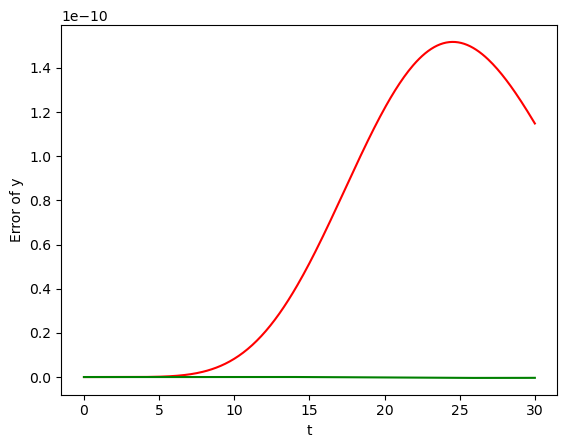

In [53]:
plt.xlabel('t')
plt.ylabel('Error of y')
#plt.plot(solution_euler[0], solution_euler[1] - test_y, 'blue')
plt.plot(solution_rk4[0], solution_rk4[1] - test_y, 'red')
plt.plot(solution_rk45[0], solution_rk45[1] - test_y, 'green')